# The hippocampus as a predictive map
Kimberly L Stachenfeld, Matthew M Botvinick & Samuel J Gershman 

https://www.nature.com/articles/nn.4650

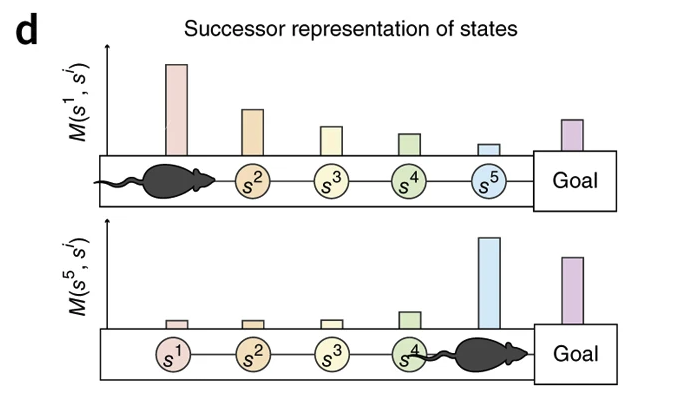

In this notbook we provide easy example on how access to Run the Succesor Representation (SR) model in multiple different types of environements.


In [1]:
import sys
sys.path.append("../")
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm
from neuralplayground.arenas import Simple2D, Sargolini2006, Hafting2008, BasicSargolini2006
from neuralplayground.agents import  Stachenfeld2018


## Initialise the arena

We first create a random 2D arena for the agent to interact with. For more information on how to create arena refer to the arena jupyter notebook.

In [2]:
room_width = [-5,5]
room_depth = [-5,5]
env_name = "env_example"
time_step_size = 1
agent_step_size = 0.5
# Init environment
env = Simple2D(environment_name=env_name,
               arena_x_limits = room_width,
               arena_y_limits = room_depth,
               time_step_size = time_step_size,
               agent_step_size = agent_step_size)


## Initialise the SR agent

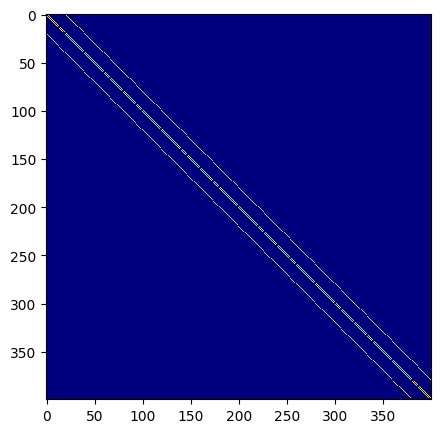

In [3]:
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 100
n_episode = 10000
state_density = int(1 / agent_step_size)
agent =  Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density,twoD=True)

The SR model is particular in the fact that one can compute the SR matrix directly without interaction with the environment. We use this as sanity check for our results bellow.

If we assume we know the transition matrix one can compute the successor representation matrix using geometric sums.


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

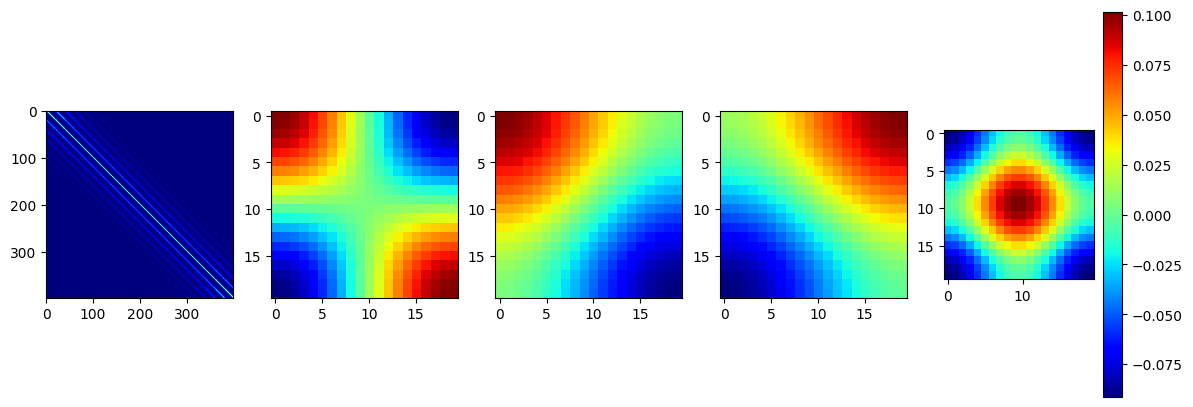

In [4]:
sr = agent.update_successor_rep()  # Choose your type of Update
agent.plot_eigen(sr, save_path=None)

Compute the successor representation matrix using TD learning

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

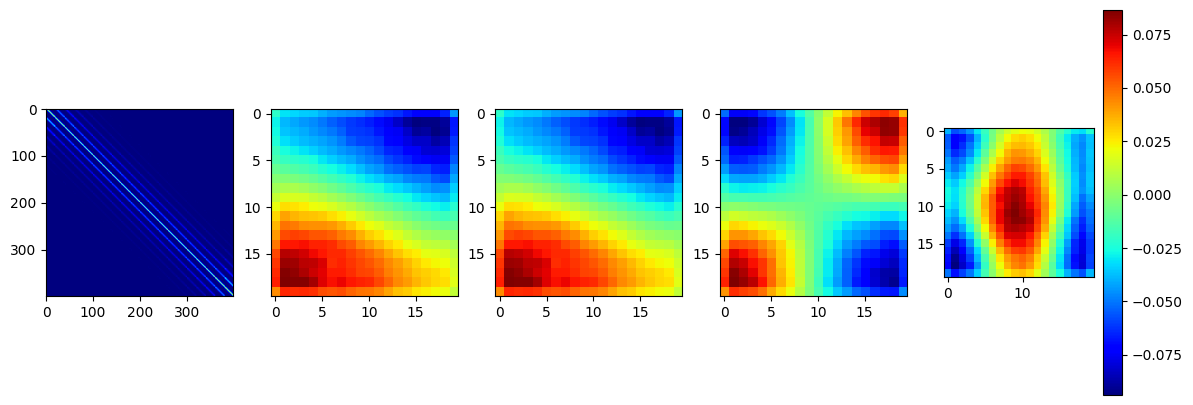

In [5]:
# Choose your function depending on the type of env '2D_env' or '1D_env' + initialisies the smart as well
# Only run if twoDvalue=True
sr_td = agent.update_successor_rep_td_full()  # Choose your type of Update
agent.plot_eigen(sr_td, save_path=None)

Compute the successor representation using successive additive update

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

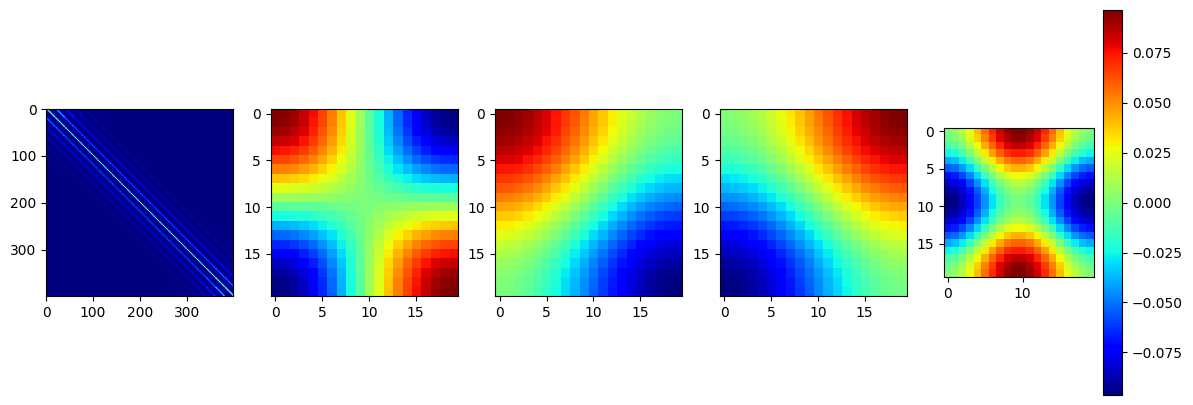

In [6]:
sr_sum= agent.successor_rep_sum()
agent.plot_eigen(sr_sum, save_path=None)

## Agent and Arena Interaction

The agent receives observations from the environment (reward, visual cues, etc.) and uses these to take an action which in turn will update both its state and the state of the environment, generating new observations. 

We note that the SR model is a discrete model. In opposition the arena is continous. The discretization is done within the agent concidering that the state representation is build my the agent.

In [ ]:
plot_every = 10000
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
for i in tqdm(range(n_episode)):
    for j in range(t_episode):
        action = agent.act(obs)  # the action is link to density of state to make sure we always land in a new
        K  = agent.update()
        obs, state, reward = env.step(action)
        obs = obs[:2]
        total_iters += 1
        if total_iters % plot_every == 0:
            agent.plot_eigen(K, save_path=None)



  4%|█▌                                     | 398/10000 [00:11<04:35, 34.85it/s]

In [ ]:
T = agent.get_T_from_M(K)
agent.plot_transition(T, save_path=None)

## Experimental arenas

We start with:
- *Conjunctive Representation of Position, Direction, and Velocity in Entorhinal Cortex*, Sargolini et al 2006 (https://www.science.org/doi/10.1126/science.1125572)

In [ ]:
data_path = data_path = "../../neuralplayground/experiments/sargolini_2006/"
env = BasicSargolini2006(data_path=data_path,
                         time_step_size=0.1,
                         agent_step_size=None)
    

Initialise the agent in this new environement

In [ ]:
agent_step_size = 10
discount = .9
threshold = 1e-6
lr_td = 1e-2
t_episode = 100
n_episode = 50
state_density = (1 / agent_step_size)
twoDvalue = True

agent = Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
               room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)



In [ ]:
sr = agent.update_successor_rep()  # Choose your type of Update
sr_td = agent.update_successor_rep_td_full()  # Choose your type of Update
sr_sum = agent.successor_rep_sum()
agent.plot_eigen(sr, save_path=None)
agent.plot_eigen(sr_sum, save_path=None)
agent.plot_eigen(sr_td, save_path=None)

Agent and Arena Interaction

In [ ]:
plot_every = 100000
total_iters = 0
obs, state = env.reset()
obs = obs[:2]
for i in tqdm(range(1000000)):
# Observe to choose an action
    action = agent.act(obs)  # the action is link to density of state to make sure we always land in a new
    K  = agent.update()
    obs, state, reward = env.step(action)
    obs= obs[:2]
    total_iters += 1
    if total_iters % plot_every == 0:
        agent.plot_eigen(K, save_path=None)